In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import skew
import statistics
import math

In [2]:
df = pd.read_csv("data_file/study_performance.csv")

In [5]:
df.shape

(1000, 8)

In [7]:
df.count()

gender                         1000
race_ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64

In [8]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df[df["gender"] == "female"].gender.count()

518

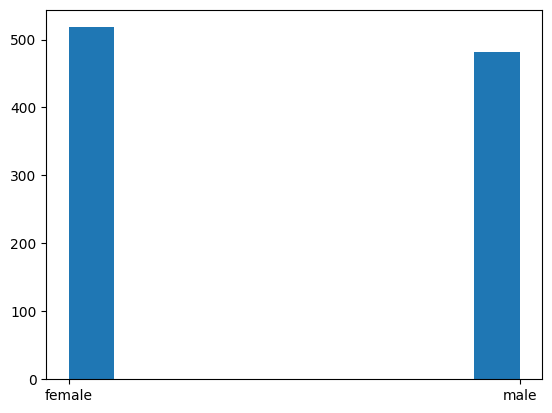

In [17]:
plt.hist(df["gender"])
plt.show()

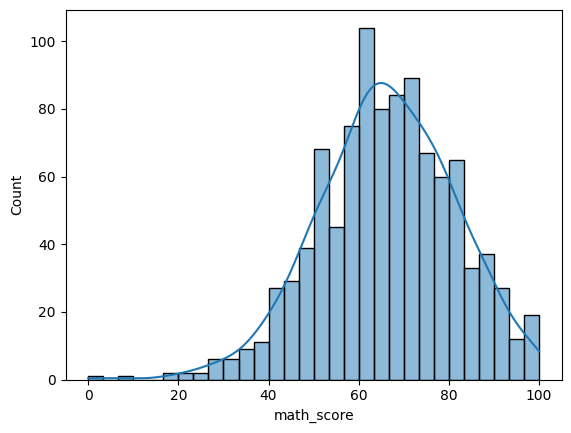

In [24]:
sns.histplot(df["math_score"], kde=True, bins=30)
plt.show()

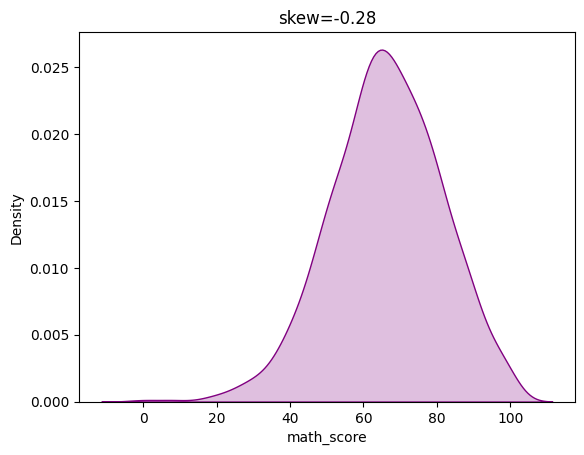

In [29]:
sns.kdeplot(df["math_score"], fill=True, color="purple")
plt.title(f"skew={np.round(skew(df["math_score"]), 2)}")
plt.show()

In [33]:
math_score = list(df["math_score"])

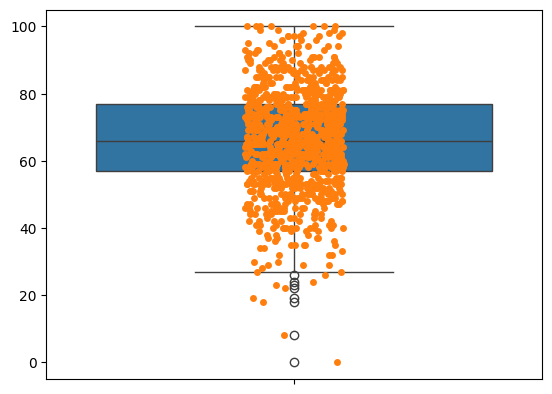

In [35]:
sns.boxplot(math_score)
sns.stripplot(math_score)
plt.show()

In [47]:
THRESHOLD = 2
outliers = []
for item in math_score:

    mean = np.mean(math_score)
    sd = np.std(math_score)

    z_test = (item - mean) / sd

    if np.abs(z_test) > THRESHOLD:
        outliers.append(item)
outliers


[18,
 97,
 33,
 0,
 30,
 27,
 98,
 99,
 22,
 100,
 97,
 35,
 34,
 99,
 97,
 99,
 28,
 24,
 35,
 27,
 100,
 100,
 26,
 29,
 97,
 32,
 30,
 29,
 35,
 100,
 100,
 29,
 98,
 35,
 32,
 19,
 23,
 97,
 97,
 32,
 34,
 100,
 35,
 98,
 100,
 8]

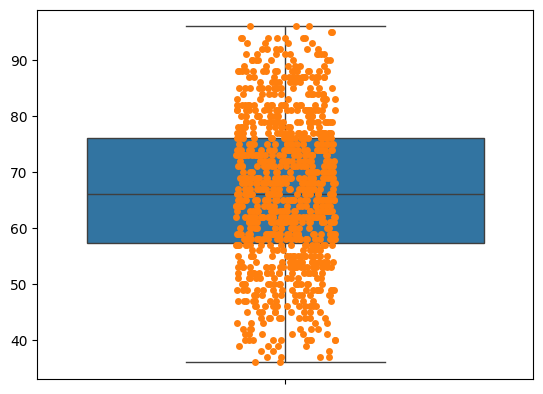

In [49]:
clean_data = [item for item in math_score if item not in outliers]
sns.boxplot(clean_data)
sns.stripplot(clean_data)
plt.show()